In [3]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=30c4804795fbf3d65cdd3f78dd5cba7d8144887b74eeaf8bc9b7bb2dee01ee8b
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


**Import Libraries**

In [4]:
import pandas as pd
from pyod.models.knn import KNN
import matplotlib.pyplot as plt
import seaborn as sns


**Load Dataset**

In [5]:
url = '/content/test.csv'
data = pd.read_csv(url)

data.head()


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


**Data Exploration**

In [6]:
# Check for missing values
print(data.isnull().sum())

# Descriptive statistics
print(data.describe())

# Data types
print(data.dtypes)


id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64
                id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300

**Anomaly Detection**

In [8]:
clf = KNN()
clf.fit(data)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

**Predict Anomalies**

In [9]:
outliers = clf.predict(data)

data['anomaly'] = outliers
print(data.head())


   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0    0.1        193  ...        226      1412  3476    12     7          2   
1    0.8        191  ...        746       857  3895     6     0          7   
2    0.9        186  ...       1270      1366  2396    17    10         10   
3    0.5         96  ...        295      1752  3893    10     0          7   
4    0.5        108  ...        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  anomaly  
0        0             1  

**Results Analysis and Visualization**

0    934
1     66
Name: anomaly, dtype: int64


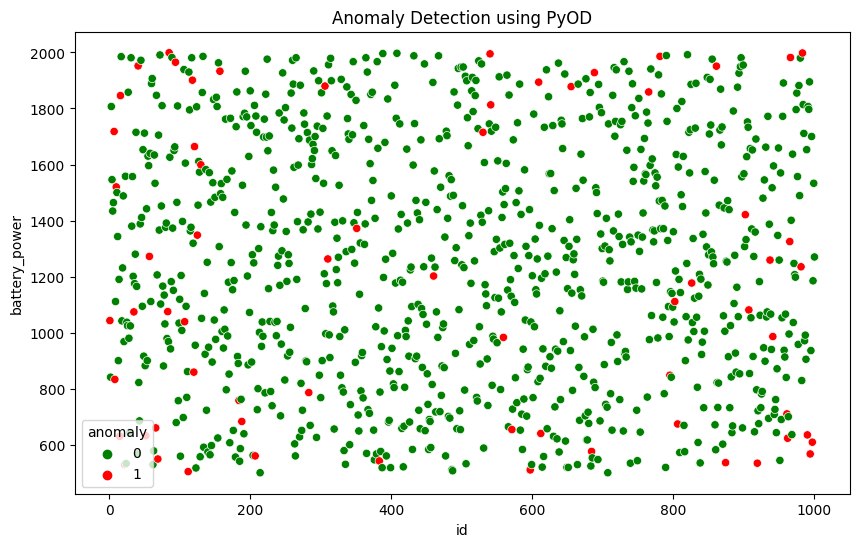

In [11]:
# Count of anomalies vs non-anomalies
print(data['anomaly'].value_counts())

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x=data.columns[0], y=data.columns[1], hue='anomaly', palette=['green', 'red'])
plt.title('Anomaly Detection using PyOD')
plt.show()
